In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading our test and train csv 
data_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
# Understanding the our data size by observing the shape  
print ("data_train shape", data_train.shape)
print ("data_train shape", data_train.shape)

data_train shape (1460, 81)
data_train shape (1460, 81)


In [4]:
#Taking brief information about our data by using info function 
# info function gives us the information of each coloumn data type 
# Also the idea about the NAN values 
# And memory usage 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#Finding number NAN values in our data 
print ('NUll values present in the train data are ',(data_train.isnull().sum().sum()))
print ('NUll values present in the test data are ',(data_test.isnull().sum().sum()))

NUll values present in the train data are  6965
NUll values present in the test data are  7000


In [6]:
#missing data
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
high_nan_col = missing_data[missing_data['Percent'] > 0.015]

print (high_nan_col.index)
high_nan_col

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'],
      dtype='object')


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479




# After anaylising our data we will come back to this topic 
- Let's analyse this to understand how to handle the missing data.

- We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete.
- The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). 

- We are going to drop all this colums from our DataFrame as it contsins lots of missing values 


In [7]:
data_train = data_train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'],axis=1)


In [8]:
print ('after droping the columns having high missing values our shape of the data is',data_train.shape)

after droping the columns having high missing values our shape of the data is (1460, 65)


In [9]:
# spliting data in numerical and catagorical Dataframe
num_df = data_train.select_dtypes(include = 'int64')
print ('Shape of numerical dataframe is ' , num_df.shape)
num_df.head()


Shape of numerical dataframe is  (1460, 35)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# spliting data in numerical and catagorical Dataframe
cat_df = data_train.select_dtypes(include = 'object')
print ('Shape of catagorical dataframe is ' , cat_df.shape)
cat_df.head()

Shape of catagorical dataframe is  (1460, 29)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [11]:
# spliting data in numerical and catagorical Dataframe
flot_df = data_train.select_dtypes(include = 'float64')
print ('Shape of catagorical dataframe is ' , flot_df.shape)
flot_df.head()

Shape of catagorical dataframe is  (1460, 1)


,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

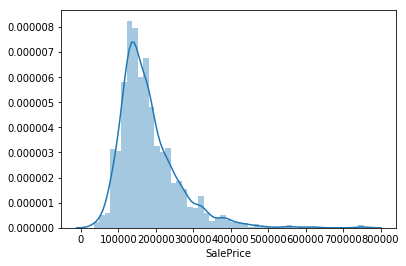

In [12]:
sns.distplot(num_df['SalePrice']);
num_df['SalePrice'].describe()

Above distribution plot shows that 
- deviated distribution towrds left which indicates that saleing prize have skewness 
- appreciably it is skewed 
- by describe fuction it is eveident that mean is greater then median  that is capture beautifuly in the distplot
- positive skewness is observe 
- peakiness towards tapering end 
- Has appreciably tail on right 

In [13]:
#skewness and kurtosis
print("Skewness: %f" % num_df['SalePrice'].skew())
print("Kurtosis: %f" % num_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Skewness is a measure of the symmetry in a distribution.  A symmetrical dataset will have a skewness equal to 0.  So, a normal distribution will have a skewness of 0.   Skewness essentially measures the relative size of the two tails. 
- Skewness essentially measures the relative size of the two tails. 
- Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).  Careful here.  Kurtosis is sometimes reported as “excess kurtosis.”  Excess kurtosis is determined by subtracting 3 form the kurtosis.  This makes the normal distribution kurtosis equal 0.  Kurtosis originally was thought to measure the peakedness of a distribution. 
- Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails.

In [14]:
## T count the frequency any value occuring in any numerical data coloumn
total = num_df['SalePrice'].value_counts().sort_values(ascending=False)
percent = (num_df['SalePrice'].value_counts()/total.shape[0]).sort_values(ascending=False)
print ('total number of unique values are saleprice  ',total.shape[0])


total number of unique values are saleprice   663


Now we need to know How many unique values are there in each column of the catagorical data, so that we can decide well which factor can lead us to dimension curse if we create dummies of each catagorical coloumn.

In [15]:
col_name = []
col_unique_val_count = []
for features in cat_df.columns:
    col_unique =(cat_df[features].unique())
    col_unique_val_count.append(len(col_unique))
    col_name.append(features)
    

#df = pd.concat([col_name, col_unique_val],axis=1,keys= ['col_name','col_unique_val'])
df = pd.DataFrame(list(zip(col_name, col_unique_val_count)), 
               columns =['col_name', 'col_unique_val_count'])
df.head()

,col_name,col_unique_val_count
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2


Dataframe doesnot give us the great idea for such a large number of column so we can go with graphical understanding 
- scatter plot with seaborn library

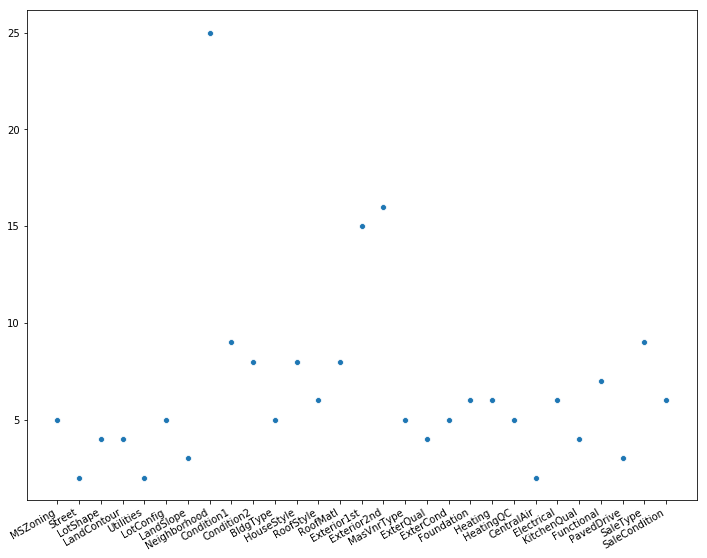

In [16]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(col_name,col_unique_val_count)
yticklabels=df.values
xticklabels=df.values
fig.autofmt_xdate()
#fig('xticklabels', labelsize=10)

Scatter plot shows our most coloumns has less then 10 different values each .
- That different values in column may contain Nan as a unique value

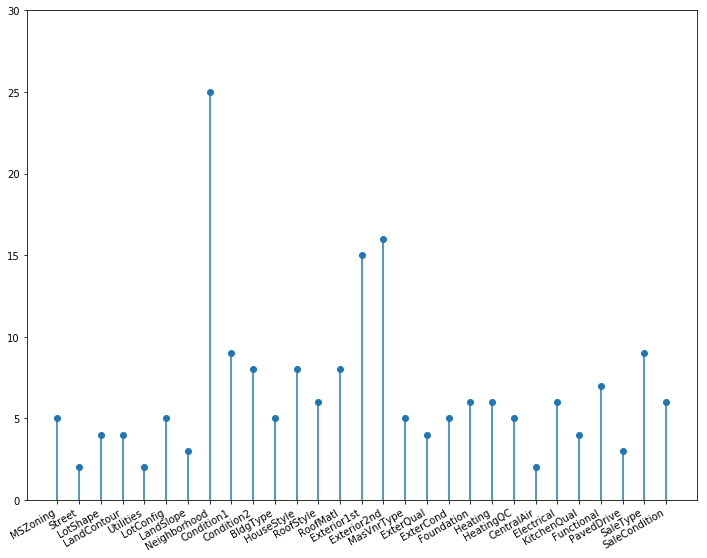

In [17]:
fig, ax = plt.subplots(figsize=(12,10))

# Draw the stem and circle
ax.stem(df.col_name, df.col_unique_val_count, basefmt=' ')

# Start the graph at 0
ax.set_ylim(0, 30)

fig.autofmt_xdate()


Stem plot gives us better understanding about our ech columns unique values 

# Finding relationship between columns 

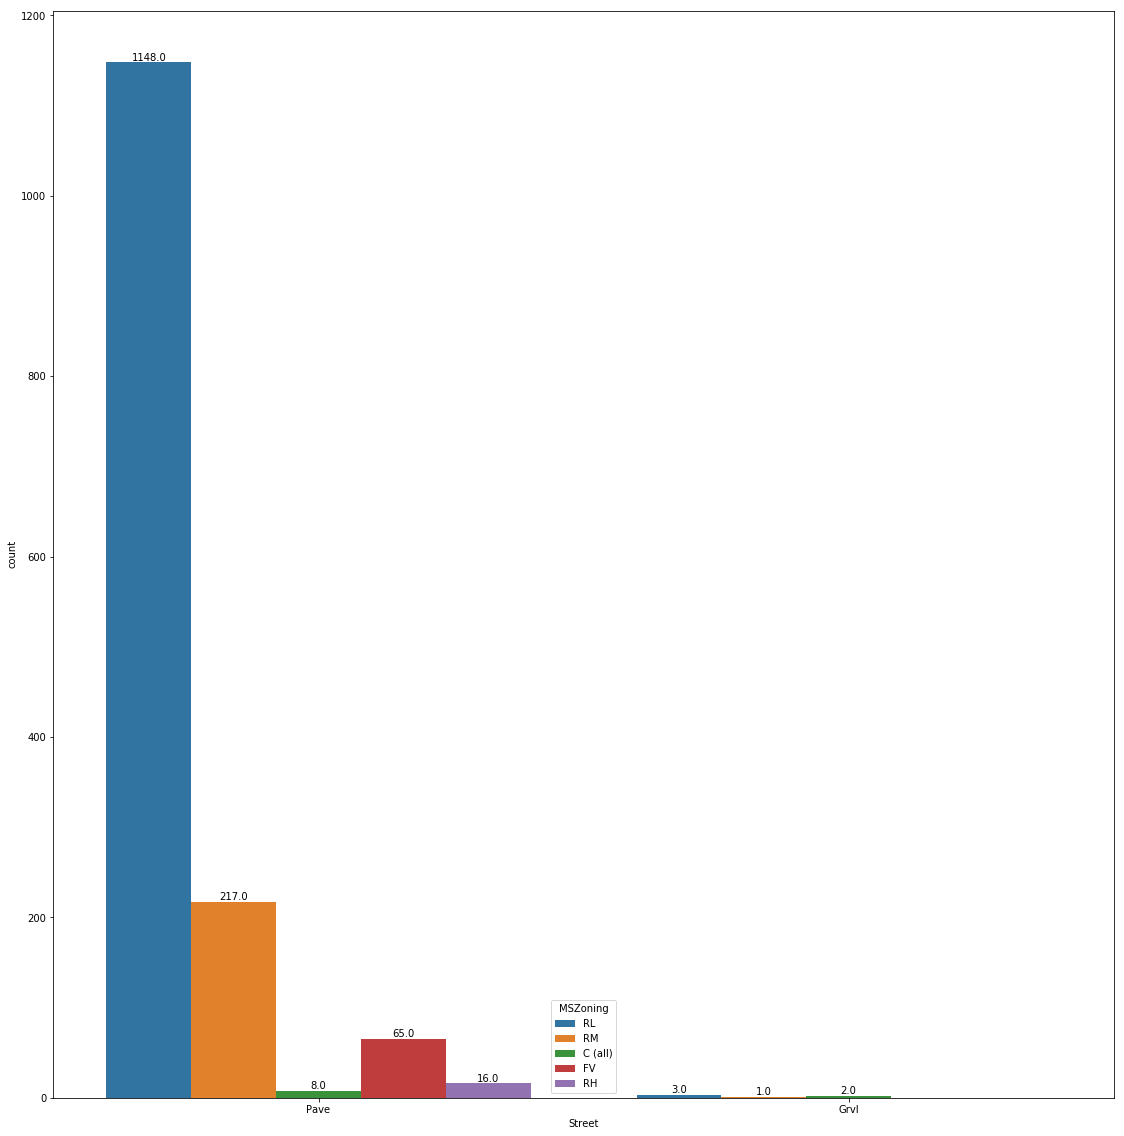

In [18]:
fig, ax = plt.subplots(figsize=(19,20))
ax = sns.countplot(x="Street",hue='MSZoning', data=data_train);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")

#Most of the houses has paved connectivity , that means road connectivity

In [19]:
data_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [20]:
# checking unique values for numerical columns 
col_name = []
col_unique_val_count = []
for features in num_df.columns:
    col_unique =(num_df[features].unique())
    col_unique_val_count.append(len(col_unique))
    col_name.append(features)
    

#df = pd.concat([col_name, col_unique_val],axis=1,keys= ['col_name','col_unique_val'])
df = pd.DataFrame(list(zip(col_name, col_unique_val_count)), 
               columns =['col_name', 'col_unique_val_count'])

df.head()

,col_name,col_unique_val_count
0,Id,1460
1,MSSubClass,15
2,LotArea,1073
3,OverallQual,10
4,OverallCond,9


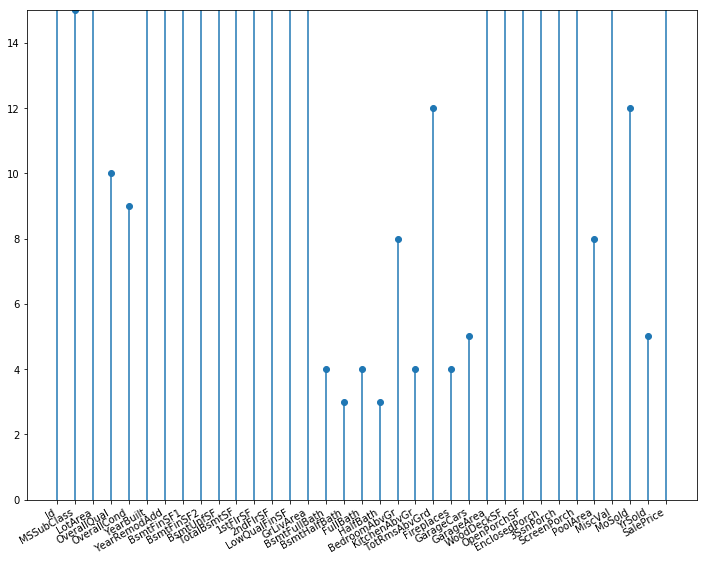

In [21]:
#plotting the to visuallize the data, as its useless to observe value beyond certain limit on y axis we can limit ourself on y asis up to 15  
fig, ax = plt.subplots(figsize=(12,10))

# Draw the stem and circle
ax.stem(df.col_name, df.col_unique_val_count, basefmt=' ')

# Start the graph at 0
ax.set_ylim(0, 15)

fig.autofmt_xdate()

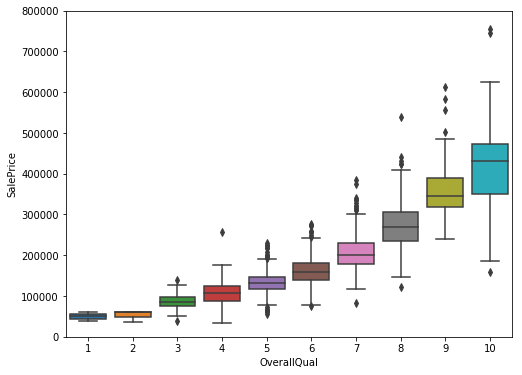

In [22]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [23]:
num_df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

As the over all quality of the house increases the prices are also increasing 

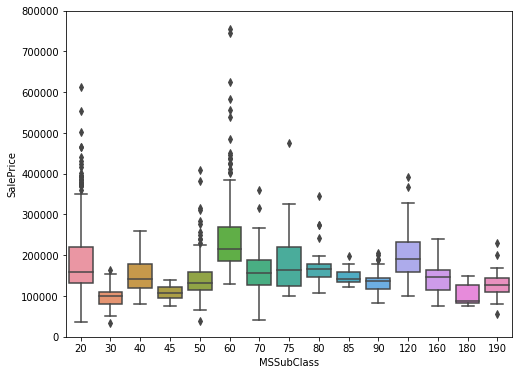

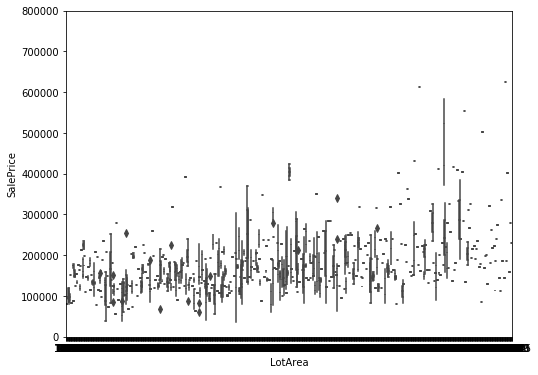

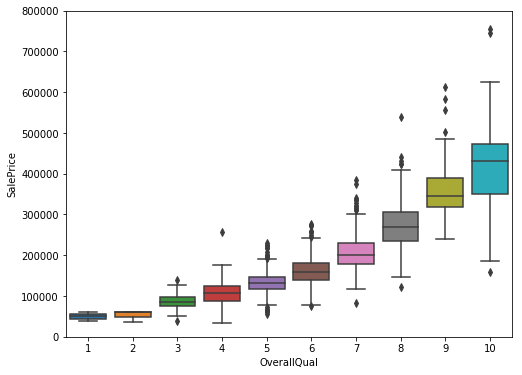

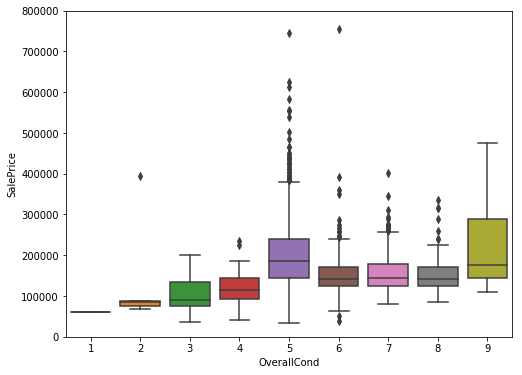

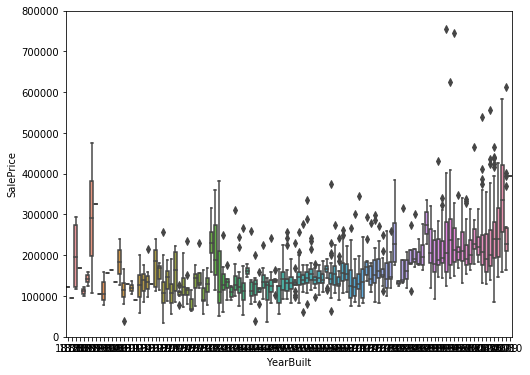

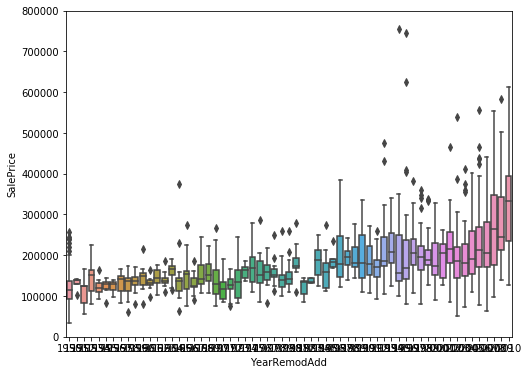

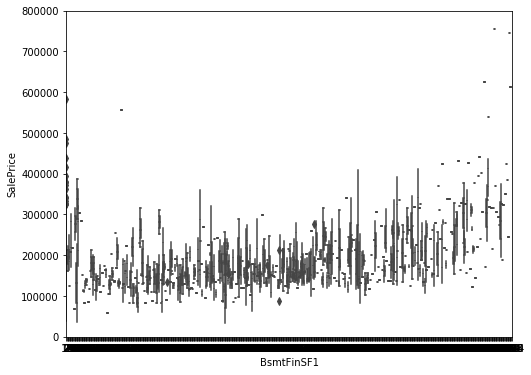

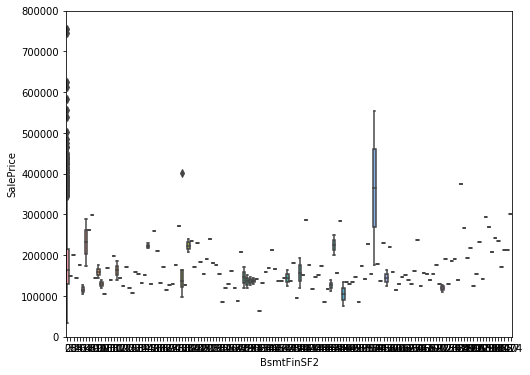

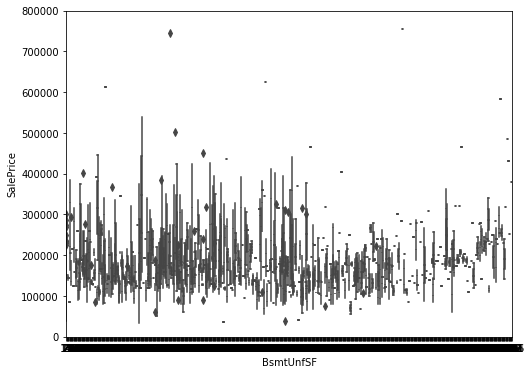

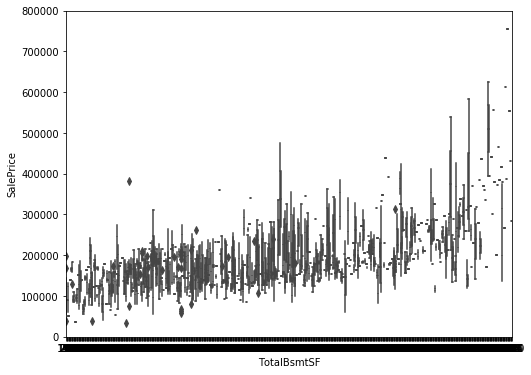

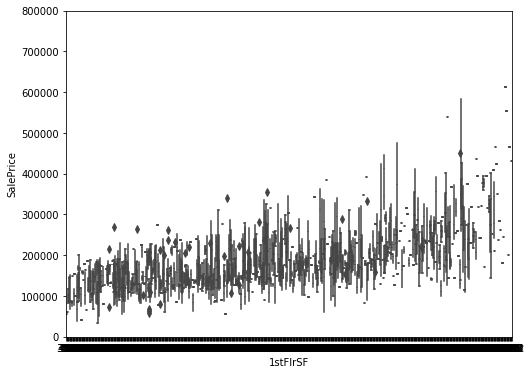

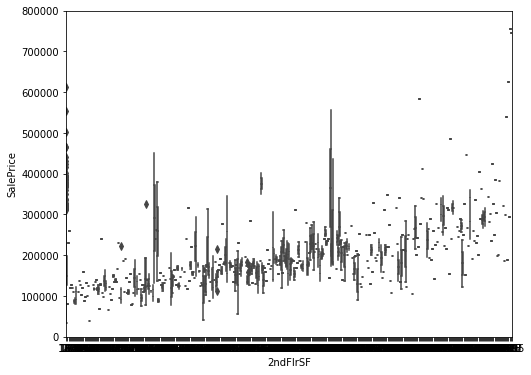

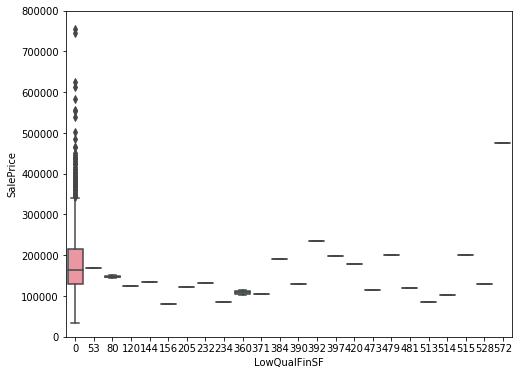

In [24]:
# ploting box plot for saleprice vs all 
col = [ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
for feature in col:
    
    var = feature
    data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

Now as we have seen multiple box plot with saleprice , although we have found some valuable insights but still the correlation with each matrix is not fully understood 
- going with corrrelation function to observe the relation ship between the various column keeping saleprice as an consideration point.

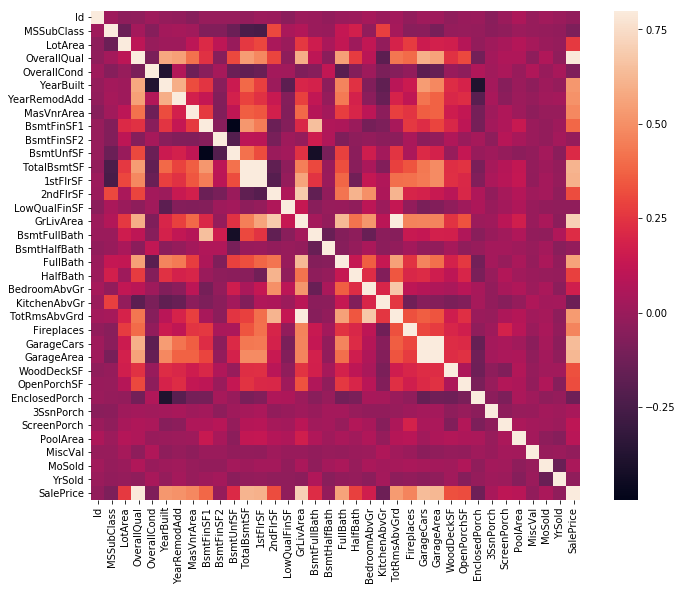

In [25]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

This heat map is some what uninterpretable 
- looking quit difficult to read

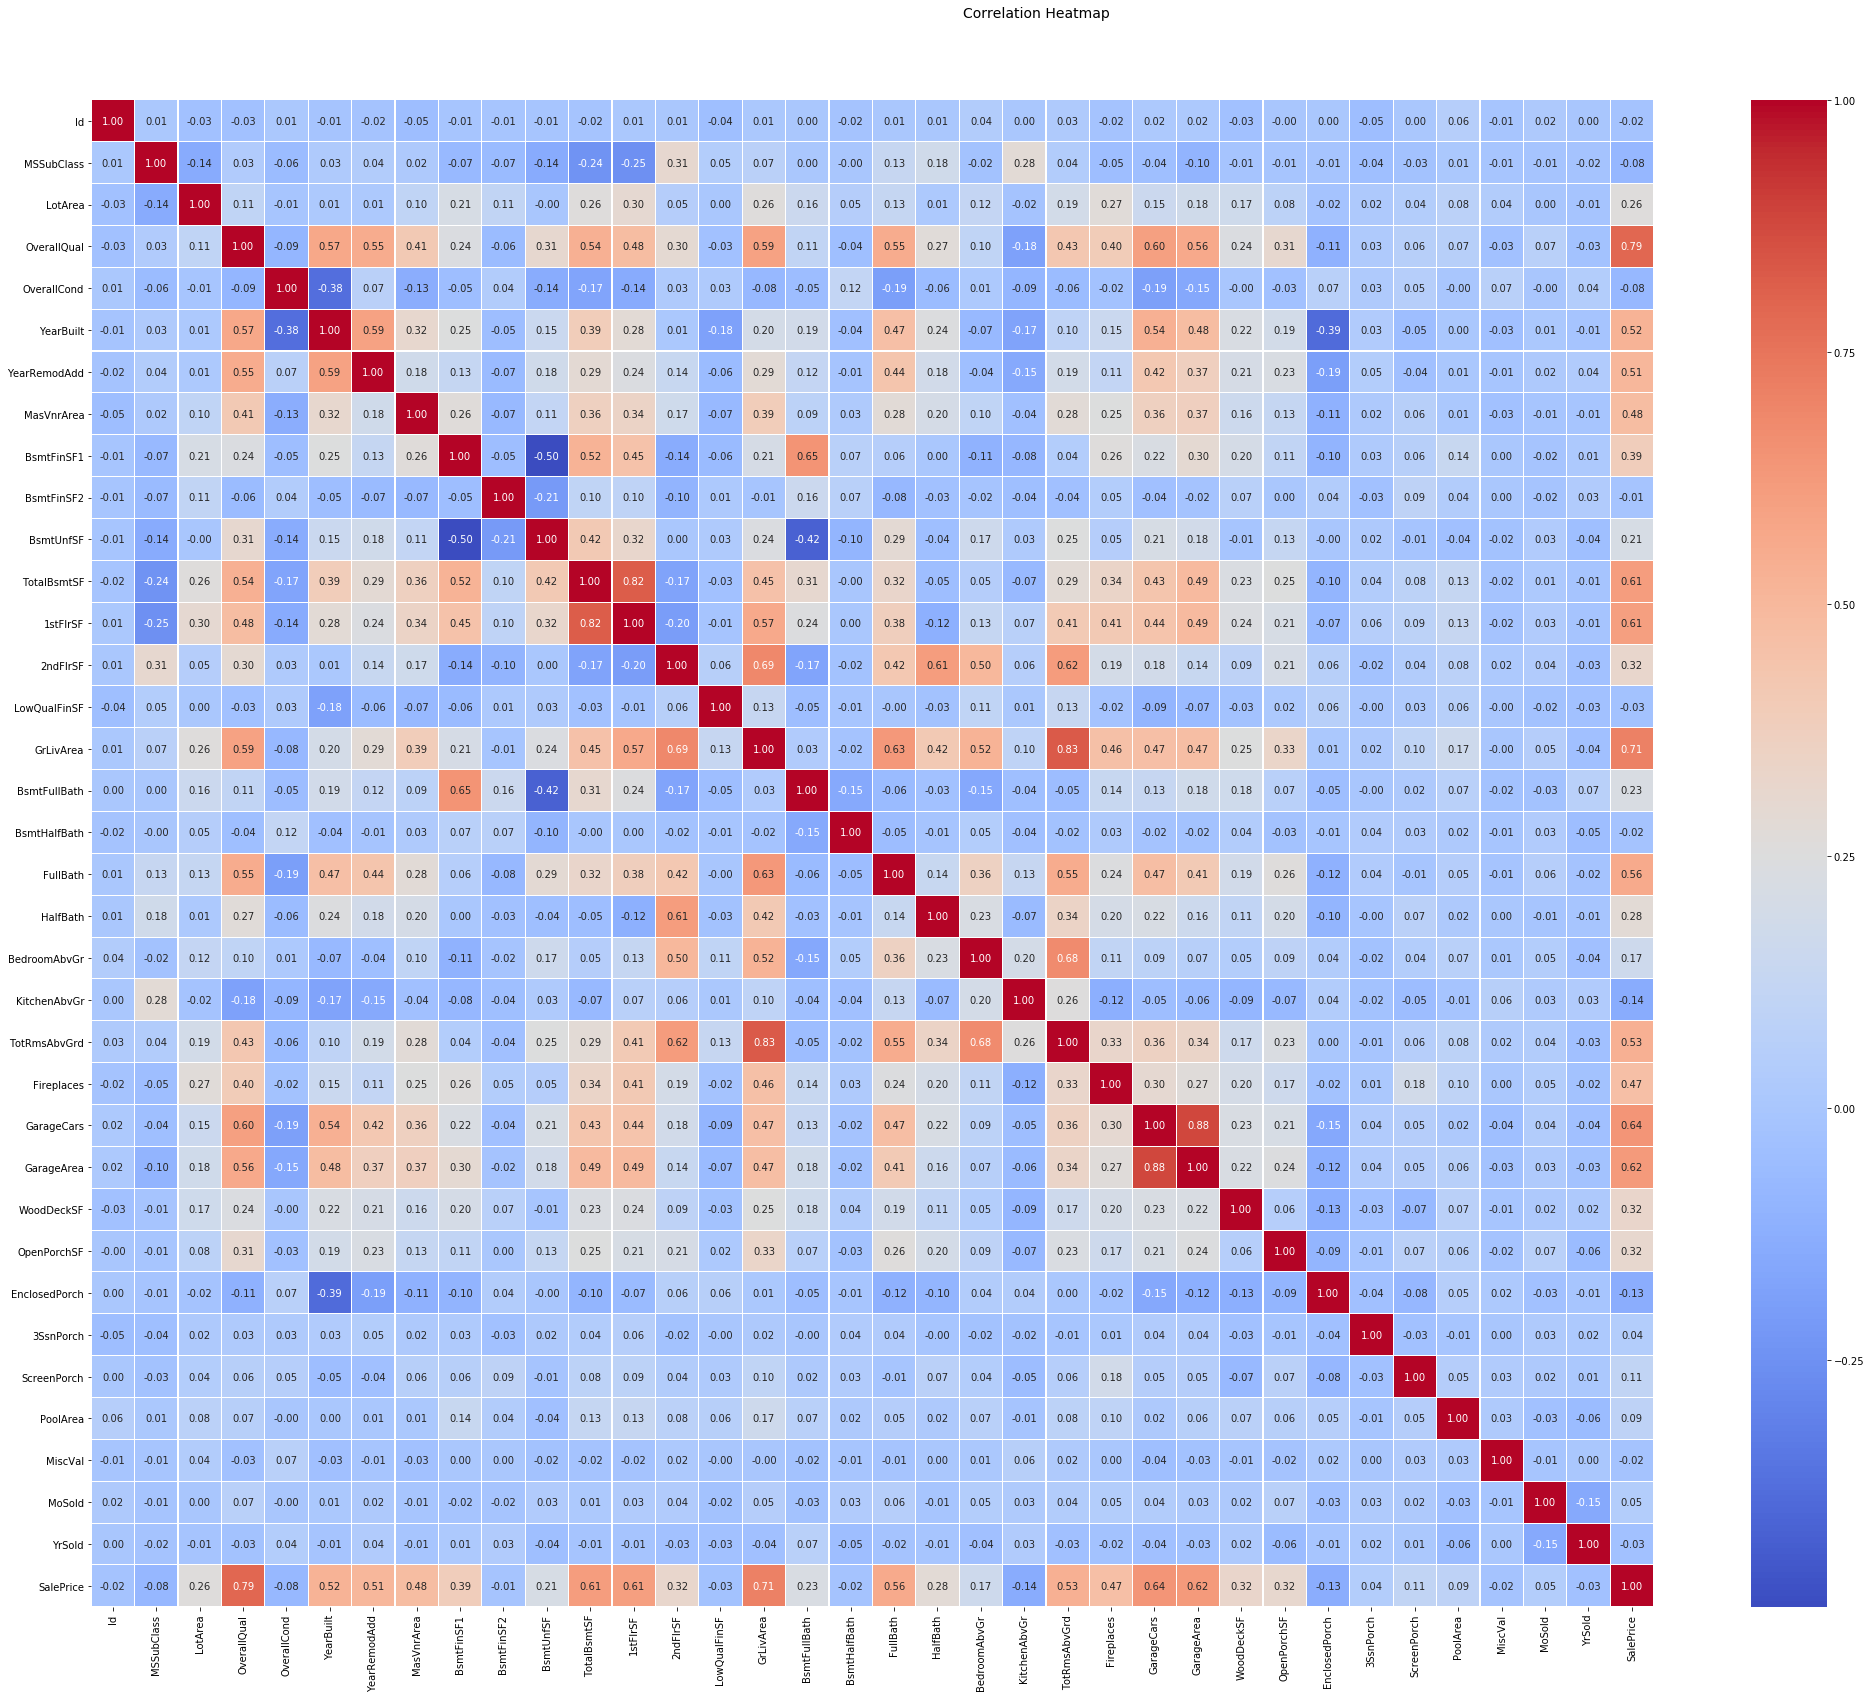

In [26]:
# crating some space for our heatmap
f, ax = plt.subplots(figsize=(35, 26))

hm = sns.heatmap(data_train.corr(),annot= True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

This heatmap is quit readable i guess we can find lots of insights from here 
- still furter we can find best k correlation between "saleprice" and others as describe bellow


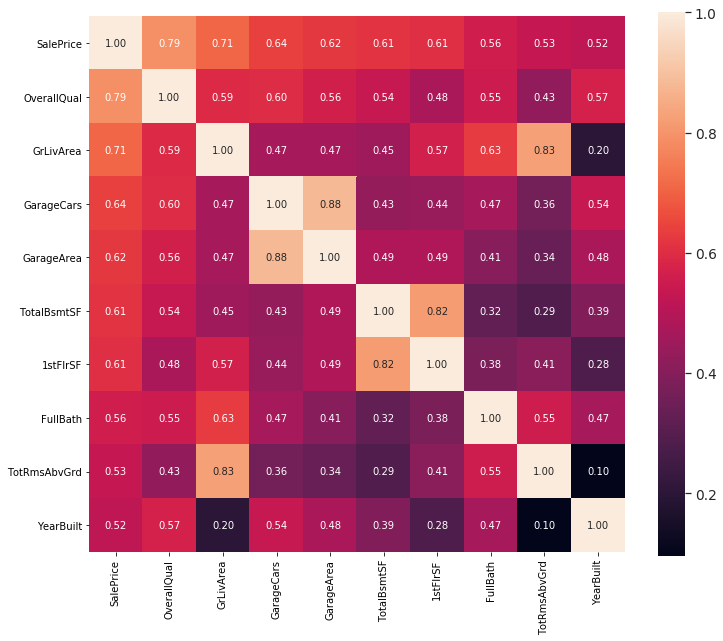

In [27]:
#saleprice correlation matrix with best k coloumn
f, ax = plt.subplots(figsize=(12, 10))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in --- the number of cars that fit into the garage is a consequence of the garage area. 
- 'GarageCars' and 'GarageArea' are alike . You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be alik. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

- 'TotRmsAbvGrd' and 'GrLivArea', somewhat alike
- It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. 

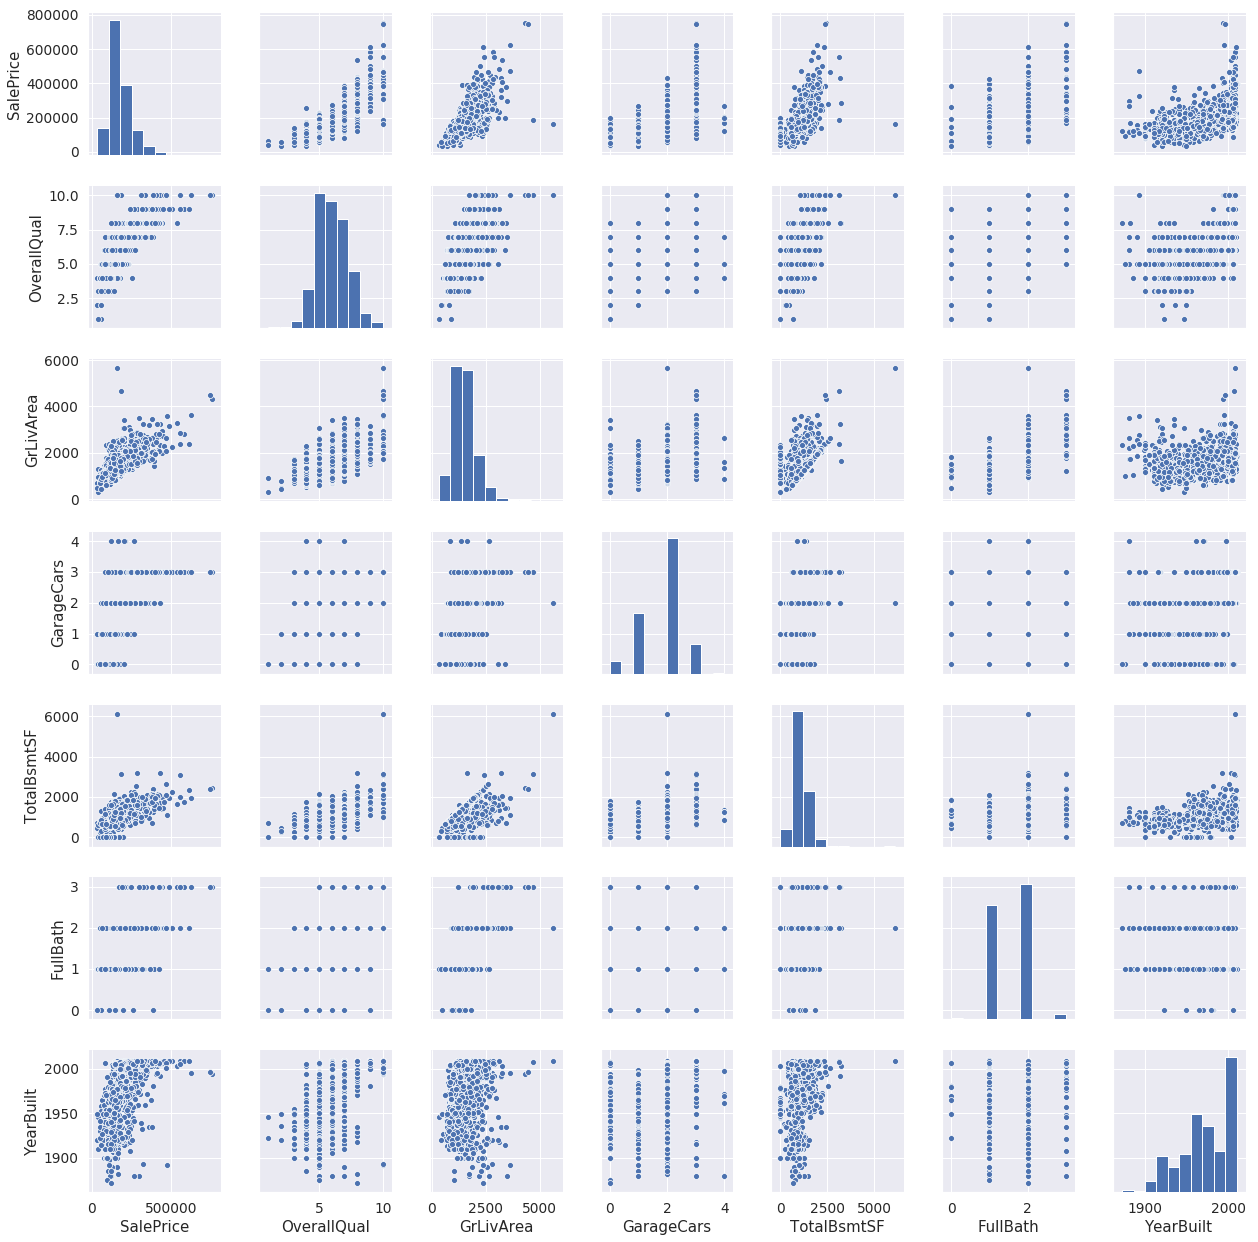

In [29]:
# As we are going to drop some column as per our observation from heatmap GarageArea , 1stfloor , grLivArea 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols]);
plt.show();

In [30]:
print ('Total number of nan values are ',data_train.isnull().sum().sum())
sorted(data_train.isnull().sum(),reverse= True)
total = data_train.isnull().sum().sort_values(ascending=False)
total.head()

Total number of nan values are  17


MasVnrArea     8
MasVnrType     8
Electrical     1
SalePrice      0
OverallCond    0
dtype: int64

# As discussed earlier we can have a look again on our missing data 

- Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

- Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

- In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data. 

In [31]:
data_train = data_train.drop(columns= ['MasVnrArea', 'MasVnrType'],axis=1)


In [32]:
print ("in our data set we have only on nan point in 'Electrical' column ",data_train.isnull().sum().sum())
data_train = data_train.dropna(axis=0) # droping that data point 

in our data set we have only on nan point in 'Electrical' column  1


In [33]:
print ("after considering all NAN value our data set shape is ",data_train.shape)

after considering all NAN value our data set shape is  (1459, 63)


# Lets test Some assumptions To apply modeling 

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - It refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.



In [37]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


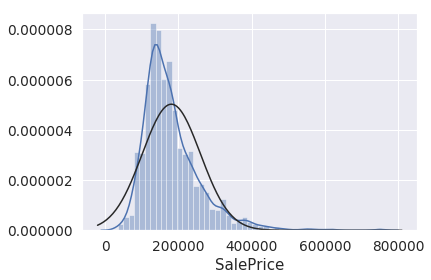

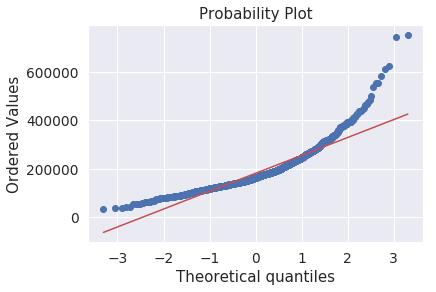

In [40]:
#histogram and normal probability plot
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

### SalePrice is not a normal distribution 
- but we can make it normal by using log transformation

In [43]:
data_train['SalePrice'] = np.log(data_train['SalePrice'])

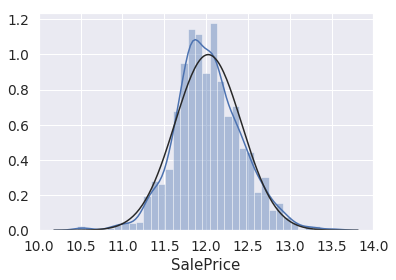

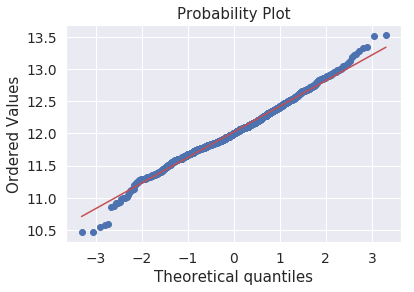

In [44]:
#histogram and normal probability plot
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

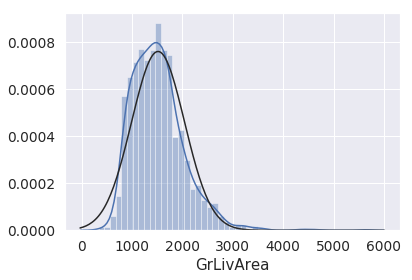

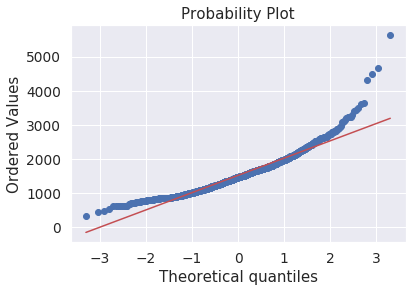

In [46]:
#GrLivArea 
#histogram and normal probability plot
sns.distplot(data_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['GrLivArea'], plot=plt)

In [47]:
data_train['GrLivArea'] = np.log(data_train['GrLivArea'])

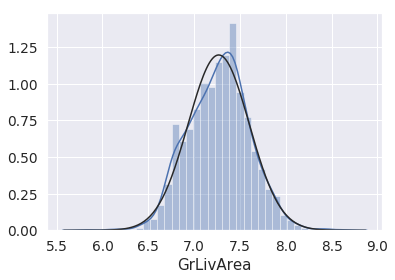

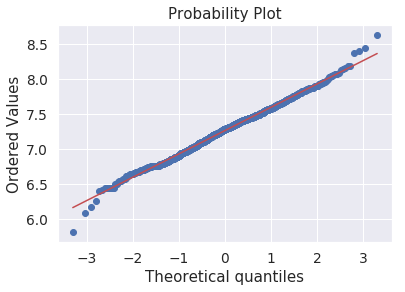

In [48]:
#GrLivArea 
#histogram and normal probability plot
sns.distplot(data_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['GrLivArea'], plot=plt)

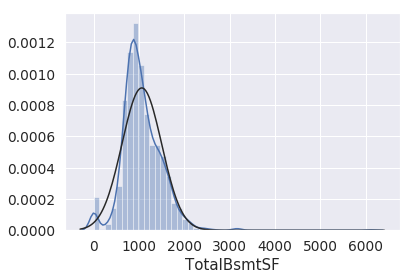

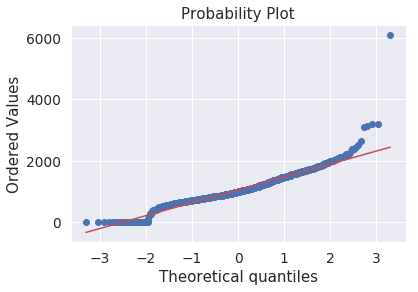

In [49]:
#TotalBsmtSF
#histogram and normal probability plot
sns.distplot(data_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['TotalBsmtSF'], plot=plt)

In [55]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
data_train['HasBsmt'] = pd.Series(len(data_train['TotalBsmtSF']), index=data_train.index)
data_train['HasBsmt'] = 0 
data_train.loc[data_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
data_train.loc[data_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(data_train['TotalBsmtSF'])


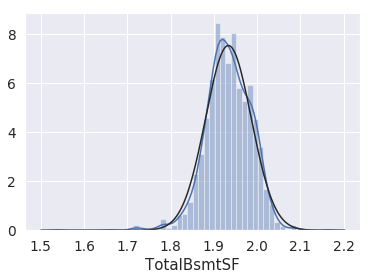

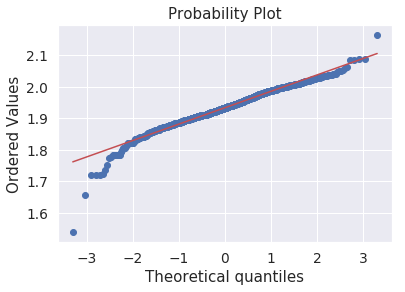

In [56]:
#histogram and normal probability plot
sns.distplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Check homoscedasticity

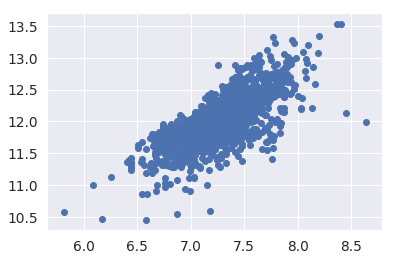

In [59]:
#scatter plot
plt.scatter(data_train['GrLivArea'], data_train['SalePrice']);

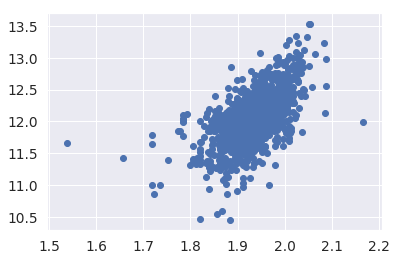

In [60]:
#scatter plot
plt.scatter(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], data_train[data_train['TotalBsmtSF']>0]['SalePrice']);

In [63]:
data_train = pd.get_dummies(data_train,drop_first=True)

In [64]:
data_train.shape

(1460, 195)